# Importing Libraries

In [1]:
import turicreate as tc
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report

# Data Analysis and Exploration

In [2]:
marks_dataset = pd.read_csv('student_dataset.csv')
marks_dataset = marks_dataset.rename(columns = {'Serial No.' : 'StudentID' , 'GRE Score' : 'gre_score',
                                   'TOEFL Score' : 'toefl_score' , 'University Rating' : 'university_rating',
                                   'Chance of Admit ' : 'admit_chance' , 'College Tier' : 'Category'})
marks_dataset

,StudentID,gre_score,toefl_score,university_rating,SOP,LOR,CGPA,Research,admit_chance,Category
0,1,337,118,4,4.5,4.5,9.65,1,0.92,B
1,2,324,107,4,4.0,4.5,8.87,1,0.76,F
2,3,316,104,3,3.0,3.5,8.00,1,0.72,G
3,4,322,110,3,3.5,2.5,8.67,1,0.80,E
4,5,314,103,2,2.0,3.0,8.21,0,0.65,J
...,...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87,C
496,497,337,117,5,5.0,5.0,9.87,1,0.96,A
497,498,330,120,5,4.5,5.0,9.56,1,0.93,B
498,499,312,103,4,4.0,5.0,8.43,0,0.73,G


In [3]:
print(type(marks_dataset['toefl_score'][0]))
print(type(marks_dataset[['gre_score' , 'toefl_score']]))

<class 'numpy.int64'>
<class 'pandas.core.frame.DataFrame'>


In [4]:
marks_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          500 non-null    int64  
 1   gre_score          500 non-null    int64  
 2   toefl_score        500 non-null    int64  
 3   university_rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   admit_chance       500 non-null    float64
 9   Category           500 non-null    object 
dtypes: float64(4), int64(5), object(1)
memory usage: 39.2+ KB


In [5]:
marks_dataset.corr()

,StudentID,gre_score,toefl_score,university_rating,SOP,LOR,CGPA,Research,admit_chance
StudentID,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
gre_score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
toefl_score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
university_rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
admit_chance,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


In [6]:
minmax_scaler = preprocessing.MinMaxScaler()
minmax_scaler_fit = minmax_scaler.fit(marks_dataset[['gre_score' , 'toefl_score']])
NormalizedGREAndTOEFLScore = minmax_scaler_fit.transform(marks_dataset[['gre_score', 'toefl_score']])
NormalizedGREAndTOEFLScoreData=pd.DataFrame(NormalizedGREAndTOEFLScore,columns=['gre_score', 'toefl_score'])
NormalizedGREAndTOEFLScoreData

,gre_score,toefl_score
0,0.94,0.928571
1,0.68,0.535714
2,0.52,0.428571
3,0.64,0.642857
4,0.48,0.392857
...,...,...
495,0.84,0.571429
496,0.94,0.892857
497,0.80,1.000000
498,0.44,0.392857


In [7]:
marks_dataset['gre_score'] = NormalizedGREAndTOEFLScoreData['gre_score']
marks_dataset['toefl_score'] = NormalizedGREAndTOEFLScoreData['toefl_score']

In [8]:
marks_dataset

,StudentID,gre_score,toefl_score,university_rating,SOP,LOR,CGPA,Research,admit_chance,Category
0,1,0.94,0.928571,4,4.5,4.5,9.65,1,0.92,B
1,2,0.68,0.535714,4,4.0,4.5,8.87,1,0.76,F
2,3,0.52,0.428571,3,3.0,3.5,8.00,1,0.72,G
3,4,0.64,0.642857,3,3.5,2.5,8.67,1,0.80,E
4,5,0.48,0.392857,2,2.0,3.0,8.21,0,0.65,J
...,...,...,...,...,...,...,...,...,...,...
495,496,0.84,0.571429,5,4.5,4.0,9.02,1,0.87,C
496,497,0.94,0.892857,5,5.0,5.0,9.87,1,0.96,A
497,498,0.80,1.000000,5,4.5,5.0,9.56,1,0.93,B
498,499,0.44,0.392857,4,4.0,5.0,8.43,0,0.73,G


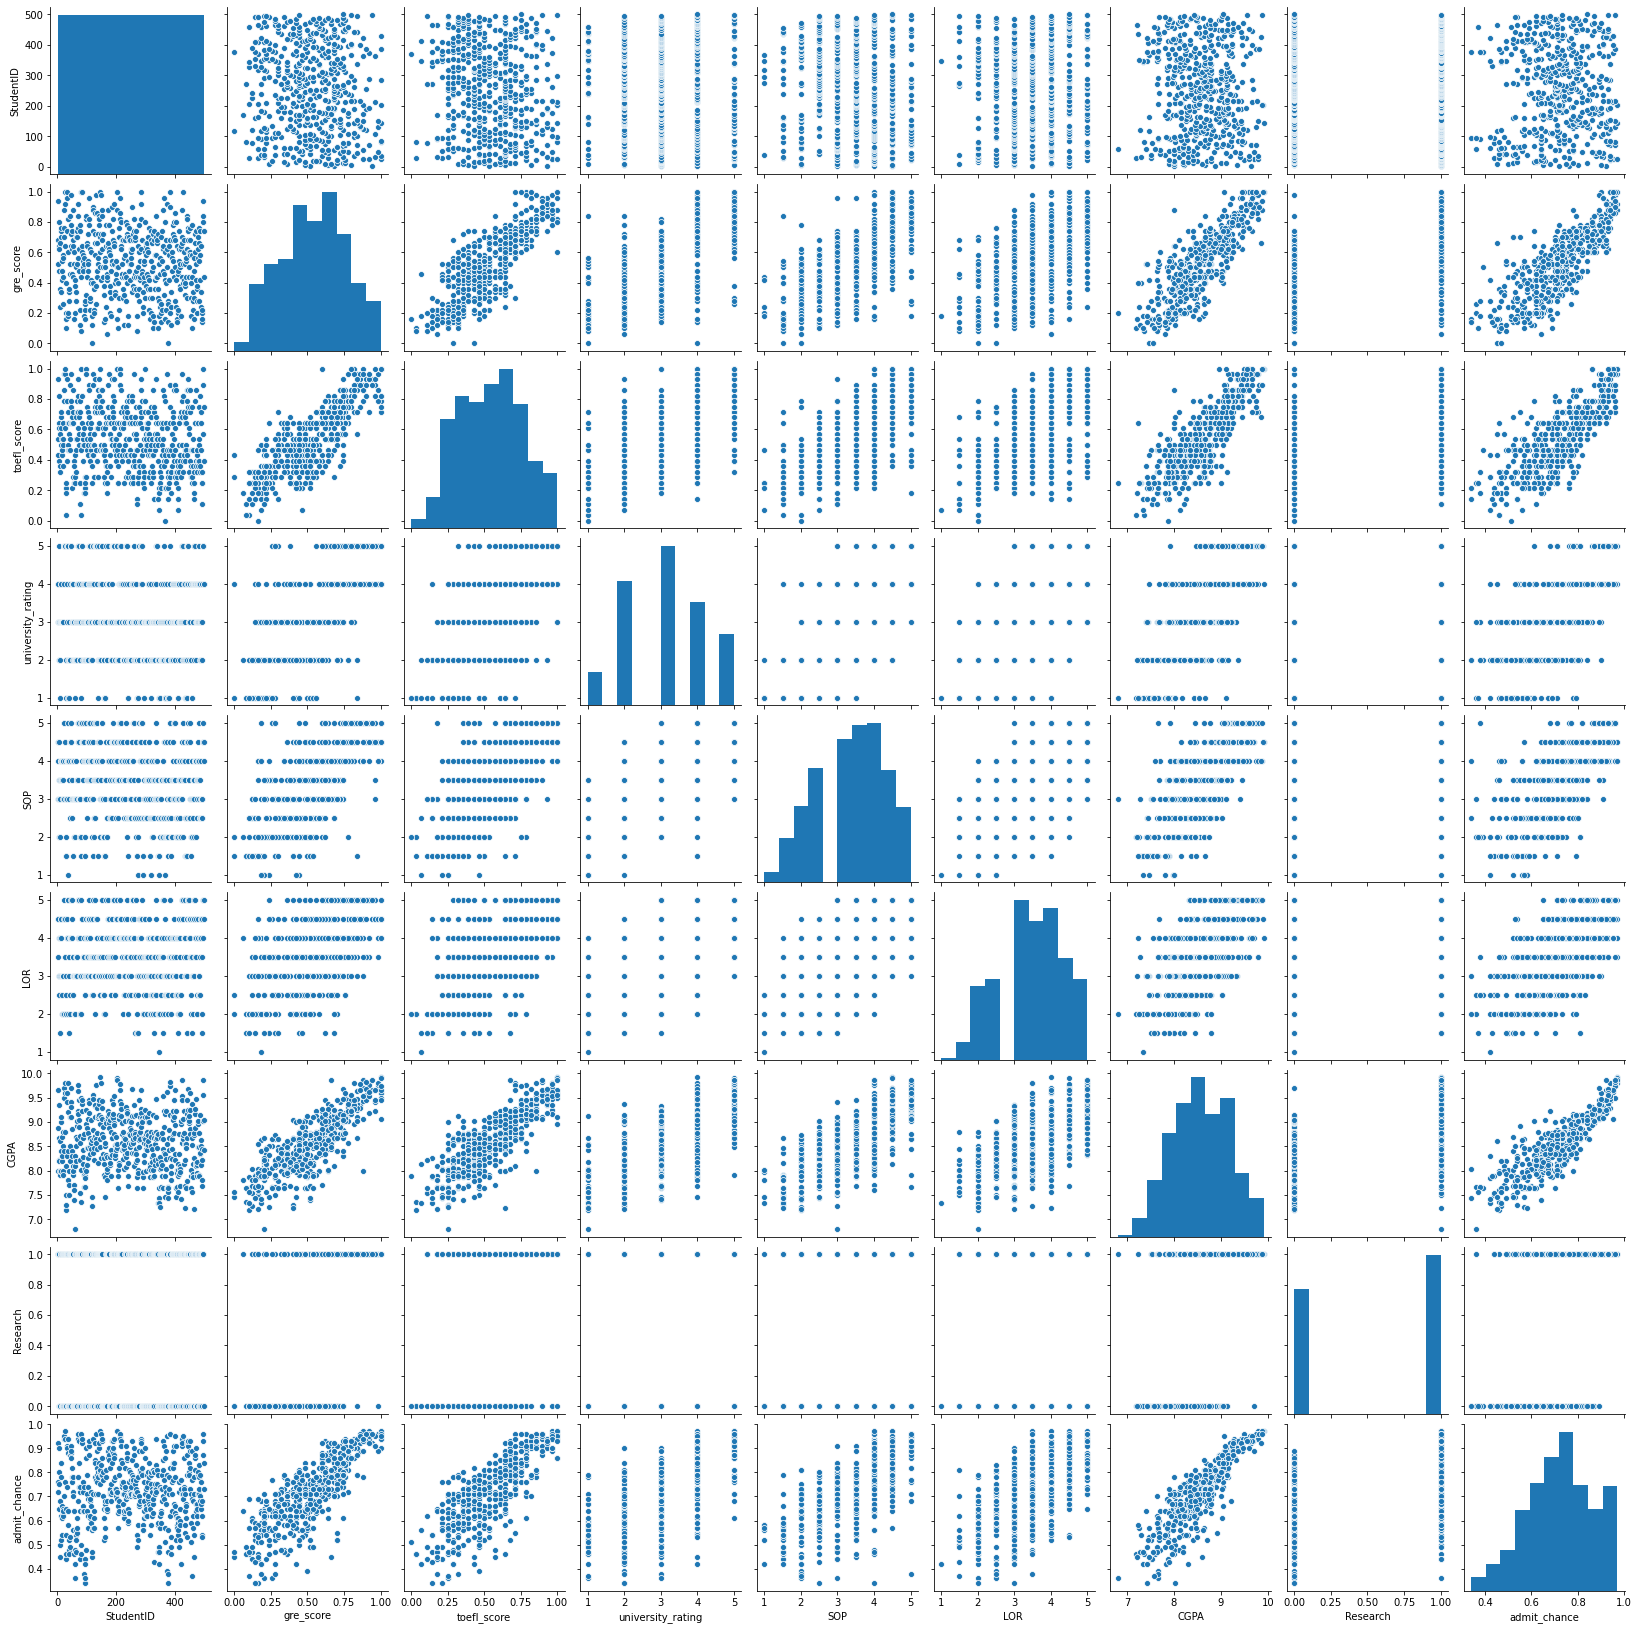

In [9]:
sns.pairplot(marks_dataset)

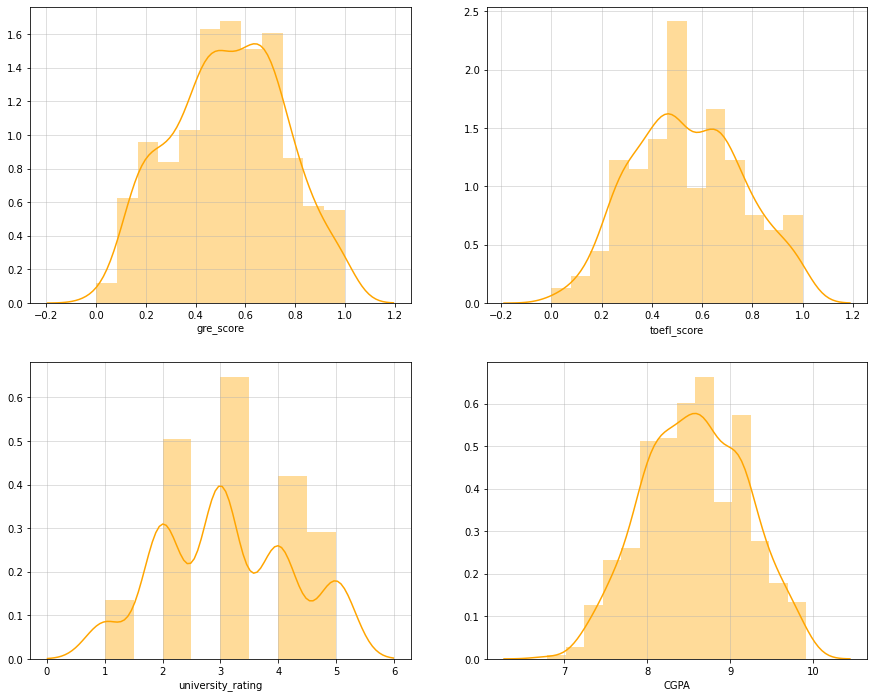

In [10]:
plt.figure(figsize=(15,12))
plt.subplot(2,2,1)
sns.distplot(marks_dataset['gre_score'], color='Orange')
plt.grid(alpha=0.5)

plt.subplot(2,2,2)
sns.distplot(marks_dataset['toefl_score'], color='Orange')
plt.grid(alpha=0.5)

plt.subplot(2,2,3)
sns.distplot(marks_dataset['university_rating'], color='Orange')
plt.grid(alpha=0.5)

plt.subplot(2,2,4)
sns.distplot(marks_dataset['CGPA'], color='Orange')
plt.grid(alpha=0.5)


In [11]:
feature_columns = list(marks_dataset.columns)
feature_columns.remove('StudentID')
feature_columns.remove('admit_chance')
feature_columns.remove('Category')

In [12]:
X=marks_dataset[feature_columns].values
y=marks_dataset['admit_chance'].values

# Random Forest Regressor

In [13]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = 10)

In [14]:
rf = RandomForestRegressor(n_estimators=100,criterion='mse')
RandomForest=rf.fit(X_train,y_train)

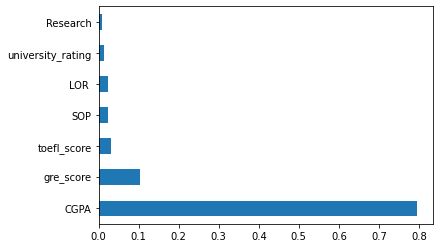

In [15]:
feature_importances = pd.Series(RandomForest.feature_importances_ , index= feature_columns)
feature_importances.nlargest(10).plot(kind = 'barh')

# Testing of RF Regressor

In [16]:
pred_admit = RandomForest.predict(X_test)
#New DataFrame 
pred_dataset = pd.DataFrame(X_test , columns=feature_columns)
pred_dataset['ChancesofAdmit'] = y_test
pred_dataset['PredictedChancesofAdmit'] = pred_admit
pred_dataset

,gre_score,toefl_score,university_rating,SOP,LOR,CGPA,Research,ChancesofAdmit,PredictedChancesofAdmit
0,0.84,0.857143,5.0,5.0,5.0,9.28,1.0,0.94,0.9149
1,0.70,0.785714,5.0,4.0,5.0,9.46,1.0,0.91,0.9210
2,0.72,0.571429,3.0,3.0,3.5,8.89,0.0,0.80,0.7853
3,0.68,0.678571,5.0,4.5,4.0,9.16,1.0,0.90,0.8688
4,0.26,0.464286,5.0,5.0,4.5,8.65,0.0,0.77,0.6684
...,...,...,...,...,...,...,...,...,...
145,0.76,0.714286,4.0,4.0,4.5,9.10,1.0,0.78,0.8456
146,0.82,1.000000,3.0,4.0,4.0,8.96,1.0,0.86,0.7908
147,0.98,0.785714,5.0,4.0,4.5,9.76,1.0,0.96,0.9568
148,0.74,0.857143,4.0,4.0,4.5,9.48,1.0,0.90,0.9231


In [17]:
pred_dataset['APE']=100 * (abs(pred_dataset['ChancesofAdmit'] - pred_dataset['PredictedChancesofAdmit'])/pred_dataset['ChancesofAdmit'])

In [18]:
print('Accuracy of the Model:',round(RandomForest.score(X_test,y_test)*100,3),'%')
print('Mean Absolute Percent Error(MAPE): ',round(np.mean(pred_dataset['APE']),3), '%')
print('Average Accuracy of the model: ',100 - round(np.mean(pred_dataset['APE']),3), '%')

Accuracy of the Model: 78.621 %
Mean Absolute Percent Error(MAPE):  6.377 %
Average Accuracy of the model:  93.623 %


# User Input


In [19]:
print("Enter the Marks in the following order :")
user_data = np.ndarray((7,),float)
while True:
    user_data[0] = int(input("Enter GRE marks :"))
    if user_data[0] > 340:
        print('Input Invalid! Please Enter Valid GRE marks!')
        continue
    else:
        break
while True:
    user_data[1] = int(input("Enter TOEFL marks:"))
    if user_data[1] > 120:
        print('Input Invalid! Please Enter Valid TOEFL marks')
        continue
    else:
        break
while True:
    user_data[2] = int(input("Enter University Rating:"))
    user_data[3] = float(input("Enter SOP Rating:"))
    user_data[4] = float(input("Enter LOR Rating:"))
    if user_data[2]>5 or user_data[3]>5 or user_data[4] > 5:
        print('Input Invalid! Please Enter Valid Ratings')
        continue
    else:
        break        
while True:
    user_data[5] = float(input("Enter your CGPA:"))
    if user_data[5] > 10:
        print('Input Invalid! Please Enter Valid CGPA')
        continue
    else:
        break
while True:
    user_data[6] = int(input("Enter 1/0 if you have an experience in research:"))
    if user_data[6]!=0 and user_data[6]!=1:
        print('Input Invalid! Please Enter Valid Choice')
        continue
    else:
        break

Enter the Marks in the following order :
Enter GRE marks :312
Enter TOEFL marks:112
Enter University Rating:4
Enter SOP Rating:3
Enter LOR Rating:3
Enter your CGPA:8.64
Enter 1/0 if you have an experience in research:1


# Normalizing User Input and Predicting Admit Chance


In [20]:
gre_toefl_scores = user_data[0:2]
gre_toefl_scores = np.array(gre_toefl_scores)

In [21]:
gre_toefl_scores= gre_toefl_scores.reshape(1, -1)
NormalizedScore = minmax_scaler_fit.transform(gre_toefl_scores)

In [22]:
user_data[0:2] = NormalizedScore
user_data = user_data.reshape(1,-1)
user_admit_chance_predicted = RandomForest.predict(user_data)

In [23]:
print('Your Predicted Admit Chance is : ', (user_admit_chance_predicted*100),'%') 

Your Predicted Admit Chance is :  [73.18] %


In [24]:
user_values = np.array(user_admit_chance_predicted)
user_final = np.concatenate((user_data,user_values) , axis = None)

In [25]:
marks_dataset

,StudentID,gre_score,toefl_score,university_rating,SOP,LOR,CGPA,Research,admit_chance,Category
0,1,0.94,0.928571,4,4.5,4.5,9.65,1,0.92,B
1,2,0.68,0.535714,4,4.0,4.5,8.87,1,0.76,F
2,3,0.52,0.428571,3,3.0,3.5,8.00,1,0.72,G
3,4,0.64,0.642857,3,3.5,2.5,8.67,1,0.80,E
4,5,0.48,0.392857,2,2.0,3.0,8.21,0,0.65,J
...,...,...,...,...,...,...,...,...,...,...
495,496,0.84,0.571429,5,4.5,4.0,9.02,1,0.87,C
496,497,0.94,0.892857,5,5.0,5.0,9.87,1,0.96,A
497,498,0.80,1.000000,5,4.5,5.0,9.56,1,0.93,B
498,499,0.44,0.392857,4,4.0,5.0,8.43,0,0.73,G


In [26]:
feature_columns_label= list(marks_dataset.columns)
feature_columns_label.remove('StudentID')
feature_columns_label.remove('Category')

In [27]:
X_pred=marks_dataset[feature_columns_label].values
y_pred=marks_dataset['Category'].values

# Gaussian Classifier

In [28]:
X_train_tier, X_test_tier, y_train_tier, y_test_tier = train_test_split(X_pred, y_pred, random_state = 10)

In [29]:
user_final = user_final.reshape(1,-1)

In [30]:
gnb = GaussianNB().fit(X_train_tier, y_train_tier) 
gnb_test = gnb.predict(X_test_tier)

# Testing of Gaussian Classifier

In [31]:
accuracy = gnb.score(X_test_tier, y_test_tier)
print('The Accuraccy of the Gaussian Classifier Model is:' , accuracy*100,'%')

The Accuraccy of the Gaussian Classifier Model is: 87.2 %


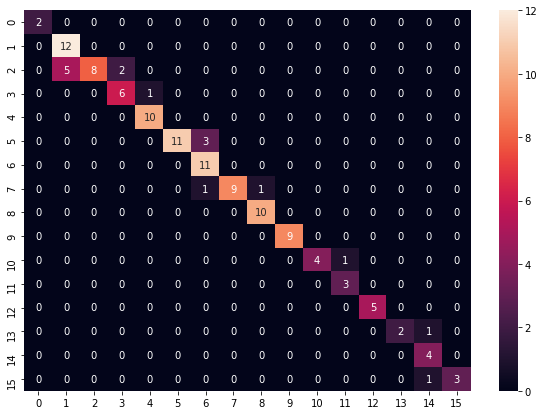

In [32]:
cm = confusion_matrix(y_test_tier, gnb_test)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)

In [33]:
print(classification_report(y_test_tier,gnb_test))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00         2
           B       0.71      1.00      0.83        12
          C        1.00      0.53      0.70        15
           D       0.75      0.86      0.80         7
           E       0.91      1.00      0.95        10
           F       1.00      0.79      0.88        14
           G       0.73      1.00      0.85        11
           H       1.00      0.82      0.90        11
           I       0.91      1.00      0.95        10
           J       1.00      1.00      1.00         9
           K       1.00      0.80      0.89         5
           L       0.75      1.00      0.86         3
           M       1.00      1.00      1.00         5
           N       1.00      0.67      0.80         3
           O       0.67      1.00      0.80         4
           P       1.00      0.75      0.86         4

    accuracy                           0.87       125
   macro avg       0.90   

In [34]:
gnb_predict_tier = gnb.predict(user_final) 
tier = str(gnb_predict_tier)[1:-1]
result = tier[1]
print('The predicted Category of College is:',result)

The predicted Category of College is: G


# Recommending the Colleges

In [35]:
colleges = pd.read_csv('colleges.csv')
colleges = colleges.rename(columns = {'College Tier' : 'Category' , 'College Name' : 'College_Name'})
colleges

,College_Name,Country,Category
0,Harvard University,United States of America,A
1,California Institute of Technology,United States of America,A
2,Massachusetts Institute of Technology,United States of America,A
3,Stanford University,United States of America,A
4,Princeton University,United States of America,A
...,...,...,...
155,Georgetown University,United States of America,P
156,University of Amsterdam,Netherlands,P
157,University of Liverpool,United Kingdom,P
158,Aarhus University,Denmark,P


In [36]:
college_pred = colleges[colleges['Category'] == result]
predicted_colleges=pd.DataFrame(college_pred,columns=['College_Name', 'Country'])

# Recommended Colleges 

In [37]:
if user_admit_chance_predicted < 0.34:
    print('Better Luck Next Time! You Can still apply to many colleges')
else:
    print('These are the top 10 colleges based on your Marks!\n\n')
    print(predicted_colleges)
    
print('\n\nAll the Best! for you future Endeavours')    

These are the top 10 colleges based on your Marks!


                            College_Name                   Country
60  University of California, Santa Cruz  United States of America
61                    Yeshiva University  United States of America
62                  University of Sydney                 Australia
63                University of Virginia  United States of America
64                University of Adelaide                 Australia
65     University of Southern California  United States of America
66                        William & Mary  United States of America
67                Trinity College Dublin       Republic of Ireland
68                 King’s College London            United Kingdom
69                Stony Brook University  United States of America


All the Best! for you future Endeavours
